In [1]:
import pandas as pd
import random

In [2]:
cost_of_living = pd.read_csv('data/Cost of Living.csv')

# padding fips code
cost_of_living['fips'] = cost_of_living['fips'].astype(str).apply(lambda x: x.zfill(5))

cost_of_living

,area_name,case_id,state_name,state_alpha,rent,food,child_care,transportation,health_care,other,...,median_family_income,mean_family_income,total_median_share,total_mean_share,state_cost_rank,state_income_rank,state_med_affordability_rank,num_counties_in_state,fips,region
0,Autauga County,1,Alabama,AL,1005.62520,832.00439,1318.72450,1226.9673,1443.2594,665.84570,...,73010.41406,89430.39063,1.220071,0.996058,2.0,7.0,55.0,67.0,01001,Southeast
1,Baldwin County,2,Alabama,AL,922.00000,894.46722,1279.01660,1230.6757,1407.3345,658.17773,...,77884.75781,100619.71090,1.124319,0.870280,3.0,3.0,64.0,67.0,01003,Southeast
2,Barbour County (AL),3,Alabama,AL,648.00000,779.53564,970.38959,1134.3220,1415.9928,517.25244,...,42822.75391,57886.29297,1.719605,1.272118,56.0,64.0,5.0,67.0,01005,Southeast
3,Bibb County (AL),4,Alabama,AL,814.96014,734.56244,1149.85490,1270.2726,1470.2030,561.45313,...,59443.98828,71175.47656,1.374570,1.148006,11.0,22.0,28.0,67.0,01007,Southeast
4,Blount County (AL),5,Alabama,AL,740.57007,784.53271,1097.99840,1271.1036,1470.2030,552.60486,...,63966.12891,78600.45313,1.257586,1.023441,14.0,15.0,49.0,67.0,01009,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Sweetwater County,3139,Wyoming,WY,822.00000,822.01031,1715.15530,1301.1442,1808.8269,595.68976,...,90264.17188,100073.43750,1.038281,0.936508,11.0,3.0,23.0,23.0,56037,West
3139,Teton County,3140,Wyoming,WY,1325.00000,1129.32730,2230.82790,1371.1155,1808.8269,889.29950,...,113635.75780,176638.71880,1.052642,0.677189,1.0,1.0,22.0,23.0,56039,West
3140,Uinta County (WY),3141,Wyoming,WY,734.00000,767.04303,1598.80750,1299.6438,1808.8269,543.88708,...,79810.05469,88579.14844,1.117044,1.006460,23.0,12.0,17.0,23.0,56041,West
3141,Washakie County,3142,Wyoming,WY,734.00000,814.51483,1572.94670,1320.8890,1808.8269,561.08801,...,70096.28125,79430.12500,1.284257,1.133344,22.0,19.0,7.0,23.0,56043,West


In [3]:
population = pd.read_csv('data/counties.csv')
population

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,59095,594,99
1,Baldwin County,Alabama,01003,239294,1589,151
2,Barbour County,Alabama,01005,24964,884,28
3,Bibb County,Alabama,01007,22477,622,36
4,Blount County,Alabama,01009,59041,644,92
...,...,...,...,...,...,...
3089,Sweetwater County,Wyoming,56037,41614,10426,4
3090,Teton County,Wyoming,56039,23575,4008,6
3091,Uinta County,Wyoming,56041,20635,2082,10
3092,Washakie County,Wyoming,56043,7705,2240,3


In [4]:
df = pd.read_csv('data/asecpub23csv/hhpub23.csv', usecols=['HTOTVAL', 'H_NUMPER', 'GTCO', 'GESTFIPS', 'HSUP_WGT'])

# remove all rows with missing data
df = df[(df['GTCO'] != 0) & (df['GESTFIPS'] != 0) & (df['HTOTVAL'] != 0)]

df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO
50,23,6,60721,177585,11
284,23,2,249073,39576,11
285,23,2,119153,126961,11
289,23,2,52787,128161,11
290,23,1,149570,804,11
...,...,...,...,...,...
88973,15,4,36445,96000,3
88974,15,2,68296,173540,3
88975,15,6,44578,211102,3
88976,15,5,41320,90415,3


In [5]:
sum(df['HSUP_WGT'] * df['HTOTVAL'])/sum(df['HSUP_WGT'])

115122.78178084039

In [6]:
sample_df = df.sample(n=10000, weights=df['HSUP_WGT'])
sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO
70428,8,1,531357,48055,31
81645,6,5,276472,210971,37
20980,26,4,267288,124101,125
64495,48,5,268087,75000,479
37855,54,3,86789,17002,39
...,...,...,...,...,...
9413,36,1,239587,9600,81
449,23,1,151349,82395,19
58210,22,2,139396,52600,71
76547,32,3,118422,96000,3


(array([1021., 3468., 3408., 2930., 2477., 2123., 1622., 1292., 1022.,
         785.]),
 array([ -9998. ,  11000.1,  31998.2,  52996.3,  73994.4,  94992.5,
        115990.6, 136988.7, 157986.8, 178984.9, 199983. ]),
 <BarContainer object of 10 artists>)

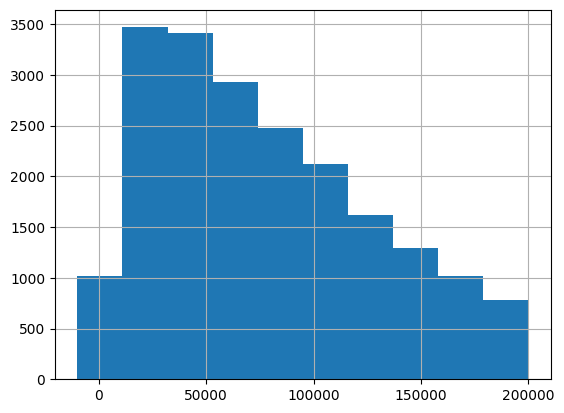

In [7]:
import matplotlib.pyplot as plt

a = df[ (df['HTOTVAL'] < 200_000) ]
b = a['HTOTVAL'].to_list()

plt.grid()
plt.hist(b)

In [8]:
# 'calculate' time
sample_df['Free Time'] = 8

# calculating FIPS codes

sample_df['GESTFIPS'] = sample_df['GESTFIPS'].astype(str).apply(lambda x: x.zfill(2))
sample_df['GTCO'] = sample_df['GTCO'].astype(str).apply(lambda x: x.zfill(3))
sample_df['Code'] = sample_df['GESTFIPS'] + sample_df['GTCO']

# renaming cost of income
sample_df = sample_df.rename(columns={'HTOTVAL': 'Income'})

sample_df


,GESTFIPS,H_NUMPER,HSUP_WGT,Income,GTCO,Free Time,Code
70428,08,1,531357,48055,031,8,08031
81645,06,5,276472,210971,037,8,06037
20980,26,4,267288,124101,125,8,26125
64495,48,5,268087,75000,479,8,48479
37855,54,3,86789,17002,039,8,54039
...,...,...,...,...,...,...,...
9413,36,1,239587,9600,081,8,36081
449,23,1,151349,82395,019,8,23019
58210,22,2,139396,52600,071,8,22071
76547,32,3,118422,96000,003,8,32003


In [9]:
# adding population density
sample_df = pd.merge(sample_df, population, left_on='Code', right_on='FIPS Code')
sample_df = sample_df.drop(columns=['FIPS Code'])

sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,Income,GTCO,Free Time,Code,County,State,Population,Area,Density
0,08,1,531357,48055,031,8,08031,City and County of Denver,Colorado,711463,155,4590
1,08,4,511963,442950,031,8,08031,City and County of Denver,Colorado,711463,155,4590
2,08,3,284022,113202,031,8,08031,City and County of Denver,Colorado,711463,155,4590
3,08,1,444333,55000,031,8,08031,City and County of Denver,Colorado,711463,155,4590
4,08,1,285000,85095,031,8,08031,City and County of Denver,Colorado,711463,155,4590
...,...,...,...,...,...,...,...,...,...,...,...,...
9836,21,1,391843,68001,015,8,21015,Boone County,Kentucky,137412,246,559
9837,21,2,342404,46940,015,8,21015,Boone County,Kentucky,137412,246,559
9838,21,1,283301,41354,015,8,21015,Boone County,Kentucky,137412,246,559
9839,36,1,385431,106527,069,8,36069,Ontario County,New York,169,662,0


In [10]:
# adding cost of living

sample_df = pd.merge(sample_df, cost_of_living[['fips', 'total_annual']], left_on='Code', right_on='fips')
sample_df['Area'] = sample_df['Area'] * 1609.344
sample_df = sample_df.rename(columns={'total_annual': 'Required Income', 'Area': 'County Area'})
sample_df = sample_df.drop(columns=['fips'])

sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,Income,GTCO,Free Time,Code,County,State,Population,County Area,Density,Required Income
0,08,1,531357,48055,031,8,08031,City and County of Denver,Colorado,711463,249448.320,4590,98286.836
1,08,4,511963,442950,031,8,08031,City and County of Denver,Colorado,711463,249448.320,4590,98286.836
2,08,3,284022,113202,031,8,08031,City and County of Denver,Colorado,711463,249448.320,4590,98286.836
3,08,1,444333,55000,031,8,08031,City and County of Denver,Colorado,711463,249448.320,4590,98286.836
4,08,1,285000,85095,031,8,08031,City and County of Denver,Colorado,711463,249448.320,4590,98286.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,21,1,391843,68001,015,8,21015,Boone County,Kentucky,137412,395898.624,559,90596.563
9837,21,2,342404,46940,015,8,21015,Boone County,Kentucky,137412,395898.624,559,90596.563
9838,21,1,283301,41354,015,8,21015,Boone County,Kentucky,137412,395898.624,559,90596.563
9839,36,1,385431,106527,069,8,36069,Ontario County,New York,169,1065385.728,0,97005.609


In [11]:
land_area = pd.read_csv("data/RDC_Inventory_Core_Metrics_County_History.csv")
# land_area.sort_values('county_fips')
land_area = land_area[(land_area['month_date_yyyymm']) > 2020_00]
land_area['county_fips'] = land_area['county_fips'].astype(str).apply(lambda x: x.zfill(5))
land_area = land_area[['median_square_feet', 'county_fips']]

land_area

,median_square_feet,county_fips
0,1623.0,37199
1,1969.0,42077
2,1782.0,36011
3,2771.0,31093
4,1830.0,48147
...,...,...
155238,1722.0,47131
155239,1768.0,20165
155240,1849.0,30099
155241,1819.0,18131


In [12]:
county_land_area = {}
state_land_area = {}

for index, row in land_area.iterrows():
    code = row['county_fips']
    state = code[:3]

    if code not in county_land_area:
        county_land_area[code] = [index]
    else:
        county_land_area[code].append(index)

    if state not in state_land_area:
        state_land_area[state] = [index]
    else:
        state_land_area[state].append(index)

In [ ]:

def select_random_row(county_code):
    if county_code in county_land_area:
        index = random.choice(county_land_area[county_code])
        return land_area.iloc[index]

    state = county_code[:3]
    index = random.choice(state_land_area[state])
    return land_area.iloc[index]

    # county_code = str(county_code).zfill(5)
    # # try to select by county
    # filtered_df = land_area[land_area['county_fips'] == county_code]
    # if len(filtered_df) > 0:
    #     return filtered_df.sample(n=1)
    
    # # select by state
    # # filtered_df = land_area[land_area['county_fips'].str[:3] == county_code[:3]]
    # # return filtered_df.sample(n=1)

houses = sample_df['Code'].apply(select_random_row)

In [ ]:
sample_df = pd.concat([sample_df.reset_index(), houses[['median_square_feet']]], axis=1)
sample_df

,index,GESTFIPS,H_NUMPER,HSUP_WGT,Income,GTCO,Free Time,Code,County,State,Population,County Area,Density,Required Income,median_square_feet
0,0,26,2,446946,155523,005,8,26005,Allegan County,Michigan,120950,2949927.552,66,77450.016,1990.0
1,1,26,1,366702,31146,005,8,26005,Allegan County,Michigan,120950,2949927.552,66,77450.016,2063.0
2,2,26,2,388461,64793,005,8,26005,Allegan County,Michigan,120950,2949927.552,66,77450.016,2070.0
3,3,26,1,355710,121941,005,8,26005,Allegan County,Michigan,120950,2949927.552,66,77450.016,2179.0
4,4,26,3,315545,145983,005,8,26005,Allegan County,Michigan,120950,2949927.552,66,77450.016,2144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,9856,13,2,361402,204006,063,8,13063,Clayton County,Georgia,297100,230136.192,2078,76473.156,1765.0
9857,9857,13,1,302923,88500,063,8,13063,Clayton County,Georgia,297100,230136.192,2078,76473.156,1817.0
9858,9858,13,4,256332,110000,063,8,13063,Clayton County,Georgia,297100,230136.192,2078,76473.156,1674.0
9859,9859,13,7,324276,349000,063,8,13063,Clayton County,Georgia,297100,230136.192,2078,76473.156,1618.0


In [ ]:
# clean up
sample_df = sample_df.drop(columns=['GESTFIPS', 'GTCO']).rename(columns={"H_NUMPER": "Number of People", "median_square_feet": "Floor Area"})
sample_df['Floor Area'] = sample_df['Floor Area'] * 0.09290304
sample_df['Density'] = sample_df['Density'] * 0.3861274922774502
sample_df

,index,Number of People,HSUP_WGT,Income,Free Time,Code,County,State,Population,County Area,Density,Required Income,Floor Area
0,0,2,446946,155523,8,26005,Allegan County,Michigan,120950,2949927.552,25.484414,77450.016,184.877050
1,1,1,366702,31146,8,26005,Allegan County,Michigan,120950,2949927.552,25.484414,77450.016,191.658972
2,2,2,388461,64793,8,26005,Allegan County,Michigan,120950,2949927.552,25.484414,77450.016,192.309293
3,3,1,355710,121941,8,26005,Allegan County,Michigan,120950,2949927.552,25.484414,77450.016,202.435724
4,4,3,315545,145983,8,26005,Allegan County,Michigan,120950,2949927.552,25.484414,77450.016,199.184118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,9856,2,361402,204006,8,13063,Clayton County,Georgia,297100,230136.192,802.372929,76473.156,163.973866
9857,9857,1,302923,88500,8,13063,Clayton County,Georgia,297100,230136.192,802.372929,76473.156,168.804824
9858,9858,4,256332,110000,8,13063,Clayton County,Georgia,297100,230136.192,802.372929,76473.156,155.519689
9859,9859,7,324276,349000,8,13063,Clayton County,Georgia,297100,230136.192,802.372929,76473.156,150.317119


In [ ]:
from modelcat import get_HPFI, get_income_index, get_space_index, get_time_index

In [ ]:
sample_HPFI = []
sample_II   = []
sample_SI   = []
sample_TI   = []

for index, row in sample_df.iterrows():
    number_of_people    = row['Number of People']
    income              = row['Income']
    free_time           = row['Free Time']
    density             = row['Density']
    required_income     = row['Required Income']
    floor_area          = row['Floor Area']

    HPFI    = get_HPFI(density, required_income, income, number_of_people, free_time, floor_area, 0)
    II      = get_income_index(income, required_income)
    SI      = get_space_index(density, number_of_people, floor_area, 0)
    TI      = get_time_index(free_time)

    sample_HPFI.append(HPFI)
    sample_II.append(II)
    sample_SI.append(SI)
    sample_TI.append(TI)

sample_HPFI

[0.8028411164576612,
 0.18669595688202162,
 0.30509712604393624,
 0.7136100301081205,
 0.7321006222763886,
 0.601611040123085,
 0.15467004629005174,
 0.9412027204013547,
 0.18934838481415991,
 0.3811665530537055,
 0.33178753070021966,
 0.2762596775666583,
 0.5213296121893214,
 0.7993276706479434,
 0.3975387432961973,
 0.06501358989841406,
 0.12842009608935773,
 0.25153728608198295,
 0.24137480367038802,
 0.10506874760878887,
 0.5821296139925436,
 0.09371977392179469,
 0.17891651138159115,
 0.12451978172457699,
 0.10168228323058749,
 0.08932381075426421,
 0.08642950340111787,
 0.5746643696001501,
 0.25437040141852907,
 0.06254476533197727,
 0.37563573783697446,
 0.11898033481930248,
 0.29784297222002043,
 0.8294111872978803,
 0.2997175558774088,
 0.11987958509553746,
 0.12673092872278385,
 0.2498264859367977,
 0.09969205284274718,
 0.2028055202299773,
 0.3041990471619233,
 0.26812536872488446,
 0.12528355053876258,
 0.08332989507128497,
 0.2194526659797599,
 0.11088130987358084,
 0.5469